In [ ]:
!gdown 1BGXKdQ7AhOnIMh7Ya6zsOJpxs-xpApSs

Downloading...
From: https://drive.google.com/uc?id=1BGXKdQ7AhOnIMh7Ya6zsOJpxs-xpApSs
To: /content/Retinal_Disease.zip
100% 762M/762M [00:08<00:00, 91.2MB/s]


In [ ]:
!unzip Retinal_Disease.zip

Archive:  Retinal_Disease.zip
   creating: Retinal_Disease/test/
   creating: Retinal_Disease/test/0/
  inflating: Retinal_Disease/test/0/171.png  
  inflating: Retinal_Disease/test/0/216.png  
  inflating: Retinal_Disease/test/0/322.png  
  inflating: Retinal_Disease/test/0/431.png  
  inflating: Retinal_Disease/test/0/437.png  
  inflating: Retinal_Disease/test/0/445.png  
  inflating: Retinal_Disease/test/0/448.png  
  inflating: Retinal_Disease/test/0/460.png  
  inflating: Retinal_Disease/test/0/563.png  
  inflating: Retinal_Disease/test/0/566.png  
  inflating: Retinal_Disease/test/0/570.png  
  inflating: Retinal_Disease/test/0/571.png  
  inflating: Retinal_Disease/test/0/575.png  
  inflating: Retinal_Disease/test/0/579.png  
  inflating: Retinal_Disease/test/0/580.png  
  inflating: Retinal_Disease/test/0/586.png  
  inflating: Retinal_Disease/test/0/587.png  
  inflating: Retinal_Disease/test/0/590.png  
  inflating: Retinal_Disease/test/0/596.png  
  inflating: Retinal_Dis

In [ ]:
# Imports
import os, warnings

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'Retinal_Disease/train',
    labels='inferred',
    label_mode='binary',
    image_size=[356, 536],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
    #validation_split=0.3;
    #subset='training',
    #seed=1
)
ds_valid_ = image_dataset_from_directory(
    'Retinal_Disease/val',
    labels='inferred',
    label_mode='binary',
    image_size=[356, 536],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
    #validation_split=0.3;
    #subset='training',
    #seed=1
)
ds_test_ = image_dataset_from_directory(
    'Retinal_Disease/test',
    labels='inferred',
    label_mode='binary',
    image_size=[356, 536],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
    #validation_split=0.3;
    #subset='training',
    #seed=1
)


Found 210 files belonging to 2 classes.
Found 45 files belonging to 2 classes.
Found 47 files belonging to 2 classes.


In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_test= (
    ds_test_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

# **Model 1**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    #CNN
    layers.Conv2D(filters=10, kernel_size=3,activation='relu'), # activation is None
    layers.MaxPooling2D(),
    layers.Conv2D(filters=20, kernel_size=3,activation='relu'), # activation is None
    layers.MaxPooling2D(),
    layers.Conv2D(filters=12, kernel_size=3,activation='relu'), # activation is None
    layers.MaxPooling2D(),
    layers.Conv2D(filters=24, kernel_size=3,activation='relu'), # activation is None
    layers.MaxPooling2D(),

    #Classification
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
    verbose=1,
)

Epoch 1/50
4/4 [==============================] - 33s 2s/step - loss: 0.6895 - binary_accuracy: 0.5619 - val_loss: 0.6766 - val_binary_accuracy: 0.5556
Epoch 2/50
4/4 [==============================] - 1s 139ms/step - loss: 0.6812 - binary_accuracy: 0.5571 - val_loss: 0.6681 - val_binary_accuracy: 0.5556
Epoch 3/50
4/4 [==============================] - 1s 139ms/step - loss: 0.6661 - binary_accuracy: 0.5571 - val_loss: 0.6543 - val_binary_accuracy: 0.5556
Epoch 4/50
4/4 [==============================] - 1s 139ms/step - loss: 0.6565 - binary_accuracy: 0.5571 - val_loss: 0.6449 - val_binary_accuracy: 0.5556
Epoch 5/50
4/4 [==============================] - 1s 141ms/step - loss: 0.6391 - binary_accuracy: 0.5571 - val_loss: 0.6467 - val_binary_accuracy: 0.5556
Epoch 6/50
4/4 [==============================] - 1s 141ms/step - loss: 0.6279 - binary_accuracy: 0.5667 - val_loss: 0.6206 - val_binary_accuracy: 0.7111
Epoch 7/50
4/4 [==============================] - 1s 137ms/step - loss: 0.6238

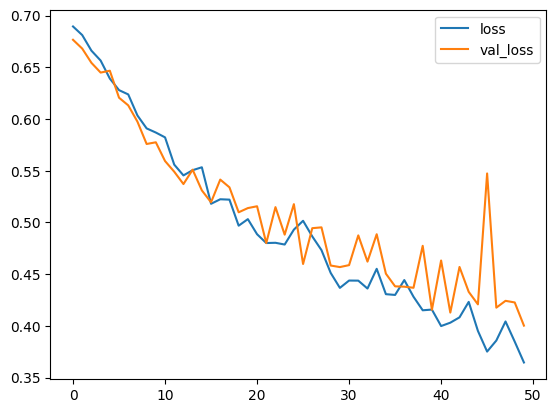

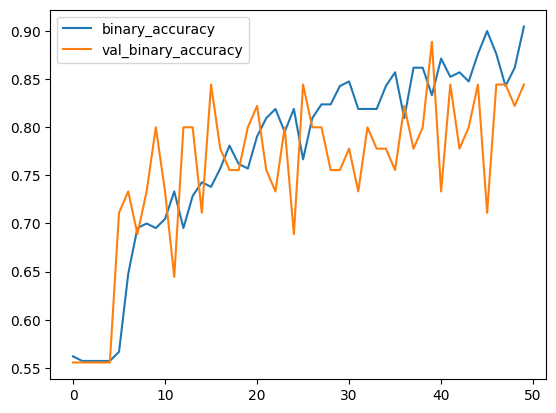

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

1/1 [==============================] - 4s 4s/step - loss: 0.5786 - binary_accuracy: 0.7660
Test accuracy: 0.766
Test loss: 0.579


#**Model 2**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

pretrained_base = VGG16(include_top=False,weights='imagenet',input_shape=(356,536,3))
pretrained_base.trainable = False

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
     pretrained_base,

    #Classification
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history2 = model2.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=1,
)

Epoch 1/30
4/4 [==============================] - 7s 1s/step - loss: 0.6749 - binary_accuracy: 0.8048 - val_loss: 1.2172 - val_binary_accuracy: 0.6000
Epoch 2/30
4/4 [==============================] - 6s 1s/step - loss: 0.4383 - binary_accuracy: 0.7905 - val_loss: 0.8589 - val_binary_accuracy: 0.6889
Epoch 3/30
4/4 [==============================] - 6s 1s/step - loss: 0.4707 - binary_accuracy: 0.7810 - val_loss: 0.4264 - val_binary_accuracy: 0.8667
Epoch 4/30
4/4 [==============================] - 6s 1s/step - loss: 0.2029 - binary_accuracy: 0.9143 - val_loss: 0.6273 - val_binary_accuracy: 0.7778
Epoch 5/30
4/4 [==============================] - 6s 1s/step - loss: 0.1699 - binary_accuracy: 0.9190 - val_loss: 0.5485 - val_binary_accuracy: 0.7778
Epoch 6/30
4/4 [==============================] - 6s 1s/step - loss: 0.2126 - binary_accuracy: 0.9095 - val_loss: 0.4700 - val_binary_accuracy: 0.8222
Epoch 7/30
4/4 [==============================] - 6s 1s/step - loss: 0.1204 - binary_accuracy:

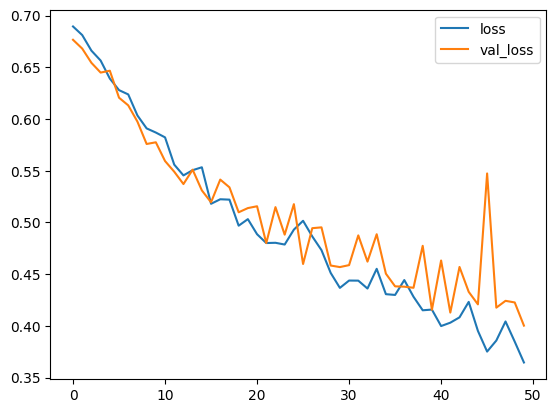

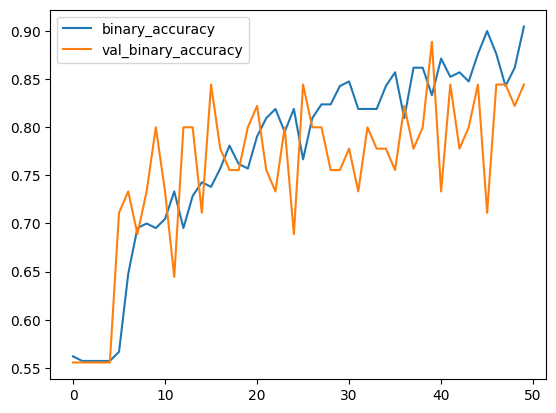

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
test_loss, test_acc = model2.evaluate(ds_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

1/1 [==============================] - 1s 1s/step - loss: 0.5936 - binary_accuracy: 0.8298
Test accuracy: 0.830
Test loss: 0.594
